In [7]:
%matplotlib inline
import collections

# --- third party modules. ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-pastel')

# local functions
import plotting
from topicmodel import TopicModel

# load 100% of data and shuffle
df = pd.read_csv('data/transcripts.csv').sample(frac=1)
df['role']    = df.name.apply(lambda a: 'WITNESS' if a == 'ZUCKERBERG' else 'CONGRESS')
df['words']   = df.text.apply(lambda a: len(a.split()))
df['cleaned'] = df.text.apply(plotting.clean_text)

witness  = df[df.role == 'WITNESS']
congress = df[df.role == 'CONGRESS']
df.head()

,name,longname,text,role,words,cleaned
1056,ZUCKERBERG,ZUCKERBERG,"Yes, that's correct.",WITNESS,3,correct
1783,WALDEN,REP. GREG WALDEN (R-ORE.),Gentleman's time has expired. Chair recognizes...,CONGRESS,11,duncan minut
1760,ZUCKERBERG,ZUCKERBERG,But the vast majority of the content on Facebo...,WITNESS,68,vast major content facebook commiss respons ma...
896,PALLONE,REP. FRANK PALLONE JR. (D-N.J.),"All right. Now, you said yesterday that each o...",CONGRESS,84,yesterday own content facebook facebook contro...
1007,BURGESS,REP. MICHAEL C. BURGESS (R-TEX.),Is the average consumer able to determine what...,CONGRESS,30,averag consum determin element poor weak consu...


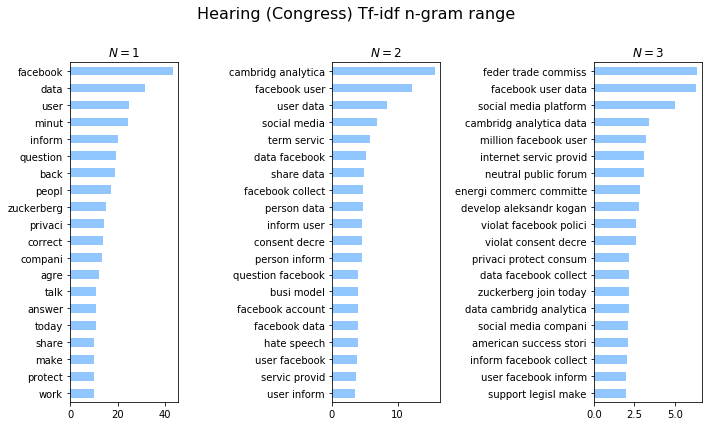

In [12]:
plotting.plot_ngrams(congress.cleaned, 1, 3, title='Hearing (Congress) Tf-idf n-gram range')

In [15]:
t2 = TopicModel(n_topics=6, max_iter=500)
t2.fit(congress.cleaned)
with open('data/congressTopics', 'w+') as fp:
    for top in t2.topics(30):
        print(top, file=fp)

Fitting LDA models with tf features, 
max_iter=500. number of topics=6. features_shape=(1038, 2841)...
Model fitted in: 72.33 secs


yeah, legisl, support legisl, support, mention, time, request, mention time, blumenth, race, februari, status, 2017, record, graham, moveon, klobuchar, time arm, race russia, respond, legisl make, facebook februari, scourg, nelson, 25th, traffick, cooper, russia, proceed, arm race

agre, divers, organ, american, black, work, african, african american, civil, talk, team, stop, folk, leadership, good, group, compani, happen, platform, civil right, investig, kind, increas, hate, monopoli, larg, role, racial, attempt, refer

question, facebook, content, zuckerberg, peopl, polit, hear, thing, today, answer, platform, corpor, respons, regul, process, talk, concern, term, conserv, speech, post, light, algorithm, issu, author, want, violenc, touch, bring, polici

facebook, user, data, inform, privaci, compani, peopl, protect, million, question, cambridg, make, analytica, facebook user, today, cambridg analytica, person, zuckerberg, platform, consum, consent, trust, concern, share, breach, american, access, issu, busi, secur

delet, california, minut, delet account, delet inform, compani, recogn, children, answer, baldwin, team, upset, compani hire, wicker, thune, voluntarili, hire, immedi, solv, told, account, firm, committe privaci, herald, herald committe, privaci initi, california herald, california minut, deriv, durbin

minut, facebook, peopl, data, provid, collect, track, internet, question, devic, kid, correct, account, share, consum, talk, committe, onlin, content, object, point, industri, phone, specif, review, recess, messag, servic, abil, children


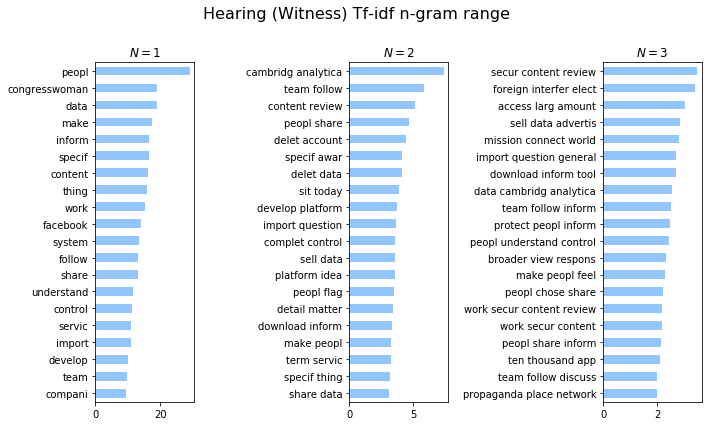

In [11]:
plotting.plot_ngrams(witness.cleaned, 1, 3, title='Hearing (Witness) Tf-idf n-gram range')

In [13]:
t1 = TopicModel(n_topics=6, max_iter=500)
t1.fit(witness.cleaned)
with open('data/witnessTopics', 'w+') as fp:
    for top in t1.topics(30):
        print(top, file=fp)

Fitting LDA models with tf features, 
max_iter=500. number of topics=6. features_shape=(766, 1710)...
Model fitted in: 45.83 secs


elect, make, peopl, follow, work, import, specif, team, inform, platform, internet, fake, compani, russian, regul, friend, app, interfer, account, number, sign, bring, fake account, thing, point, issu, answer, russia, team follow, question

congresswoman, familiar, offer, mission, servic, world, connect, model, busi model, mission connect, awar, connect world, afford, social mission, person, social, servic afford, architect, congresswoman familiar, free, align, googl, idea, busi, work, offer servic, order offer, offer free, free servic, peopl offer

cambridg, analytica, cambridg analytica, data, develop, delet, 2015, heard, sold, delet data, ident, kogan, month, told, process, learn, data cambridg, aleksandr, aleksandr kogan, ban, govern, sit, russia, page, audit, verifi, platform, action, firm, retrospect

peopl, make, content, inform, facebook, data, share, thing, control, servic, work, import, specif, understand, compani, access, respons, develop, tool, issu, question, good, review, build, advertis, general, place, today, platform, number

investig, audit, repeat, govern, conduct, complet, govern investig, audit investig, repres, legal action, govern complet, understand data, complet audit, cede, audit cambridg, process investig, confirm, investig audit, complet investig, suggest, infrastructur, paus, specif point, order, secur, temporarili, fast, chang, problem, solv

account, delet, campaign, support, intern, delet account, discuss, implement, abil, rememb, wrote, inform, provid, offer, trump, trump campaign, shut, sale, sale support, financi, record, microphon, exact, option, standard, campaign sale, updat, discuss team, hear, contract
